In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import resample
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs

In [2]:
df1 = pd.read_csv("/content/500_Cities.csv")          # reading the CSV file
df1.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,Geolocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2015,IN,Indiana,Fishers,City,BRFSS,Health Outcomes,1823278,High blood pressure among adults aged >=18 Years,%,...,24.7,NaN,NaN,76794,POINT (-85.969310702 39.9587635263),HLTHOUT,BPHIGH,1823278.0,NaN,High Blood Pressure
1,2015,CA,California,Milpitas,City,BRFSS,Health Outcomes,647766,High blood pressure among adults aged >=18 Years,%,...,22.5,NaN,NaN,66790,POINT (-121.892083025 37.433869763),HLTHOUT,BPHIGH,647766.0,NaN,High Blood Pressure
2,2015,CT,Connecticut,Stamford,City,BRFSS,Health Outcomes,973000,High blood pressure among adults aged >=18 Years,%,...,26.2,NaN,NaN,122643,POINT (-73.5589363142 41.1049145013),HLTHOUT,BPHIGH,973000.0,NaN,High Blood Pressure
3,2015,CA,California,Elk Grove,City,BRFSS,Health Outcomes,622020,High blood pressure among adults aged >=18 Years,%,...,27.8,NaN,NaN,153015,POINT (-121.384137762 38.4159992006),HLTHOUT,BPHIGH,622020.0,NaN,High Blood Pressure
4,2015,FL,Florida,Palm Bay,City,BRFSS,Prevention,1254000,Cholesterol screening among adults aged >=18 Y...,%,...,78.4,NaN,NaN,103190,POINT (-80.6666722846 27.9838255249),PREVENT,CHOLSCREEN,1254000.0,NaN,Cholesterol Screening


In [3]:
# looking for its columns
for col in df1.columns:
  print(col)

Year
StateAbbr
StateDesc
CityName
GeographicLevel
DataSource
Category
UniqueID
Measure
Data_Value_Unit
DataValueTypeID
Data_Value_Type
Data_Value
Low_Confidence_Limit
High_Confidence_Limit
Data_Value_Footnote_Symbol
Data_Value_Footnote
PopulationCount
Geolocation
CategoryID
MeasureId
CityFIPS
TractFIPS
Short_Question_Text


In [4]:
df1.shape

(810103, 24)

In [5]:
df1.groupby('CategoryID').size()

CategoryID
HLTHOUT    376673
PREVENT    288400
UNHBEH     145030
dtype: int64

### Grouping Category wise and plotting the graphs as checking on categories feature is one of our main goals.

CategoryID
HLTHOUT    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
PREVENT    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
UNHBEH     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

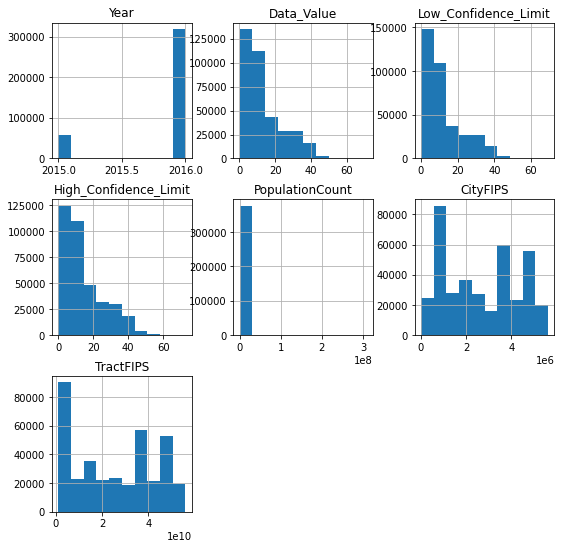

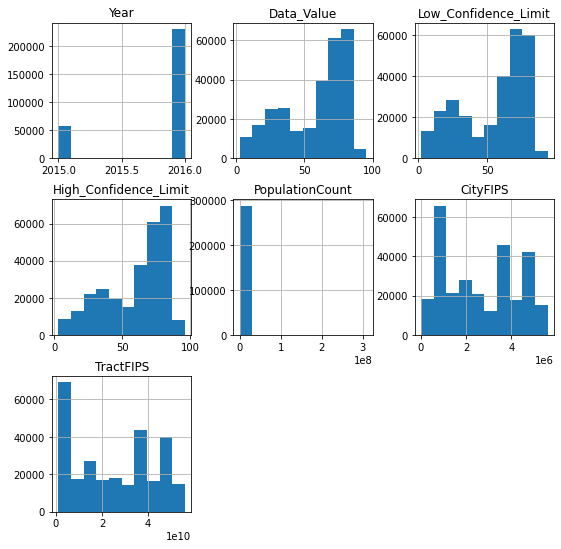

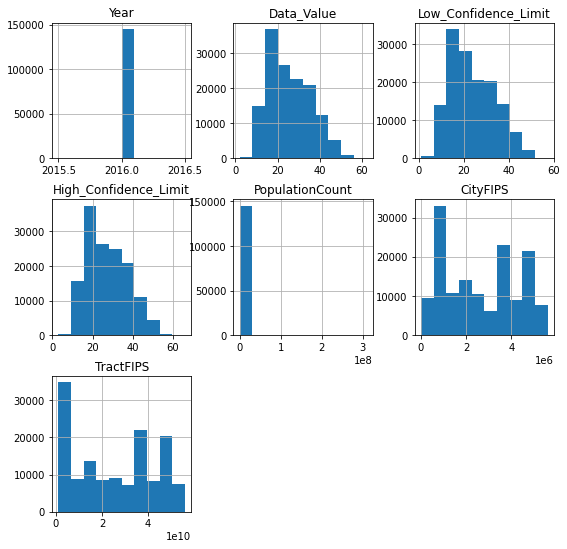

In [6]:
df1.groupby('CategoryID').hist(figsize=(9, 9))

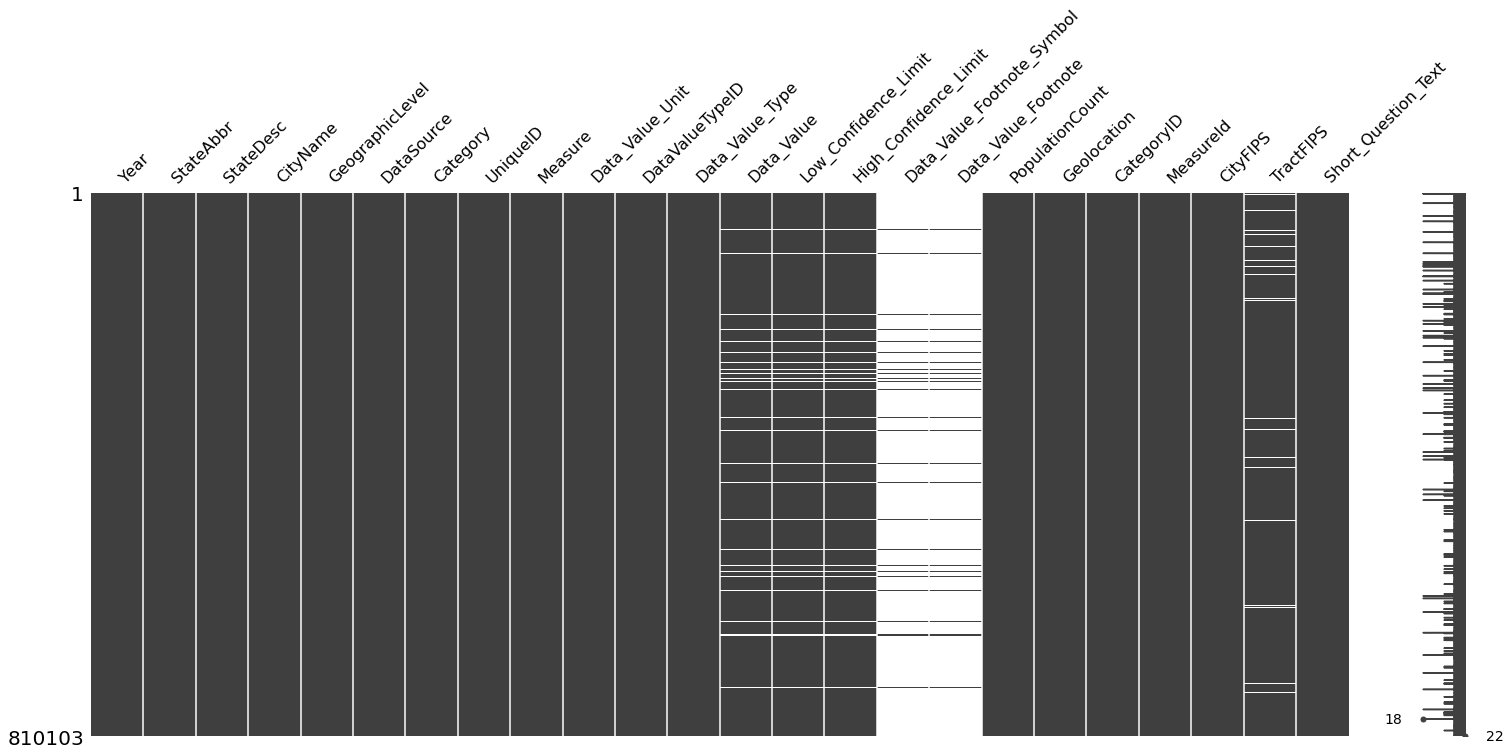

In [7]:
# Visualizing the dataframe to identify the missing values in our dataframe. 

msno.matrix(df1)

#### Therefore, all the horizontal white lines in each column represent the missing values.

#### Checking for the Null values in the whole dataframe.

In [8]:
df1.isnull().values.any()               # checking for null vaues

True

#### Counting the number of null values in each column.

In [9]:
all_nulls = df1.isnull().sum()          # count of null values in each column
all_nulls

Year                               0
StateAbbr                          0
StateDesc                          0
CityName                          56
GeographicLevel                    0
DataSource                         0
Category                           0
UniqueID                           0
Measure                            0
Data_Value_Unit                    0
DataValueTypeID                    0
Data_Value_Type                    0
Data_Value                     22792
Low_Confidence_Limit           22792
High_Confidence_Limit          22792
Data_Value_Footnote_Symbol    787309
Data_Value_Footnote           787309
PopulationCount                    0
Geolocation                       56
CategoryID                         0
MeasureId                          0
CityFIPS                          56
TractFIPS                      28056
Short_Question_Text                0
dtype: int64

### **Plotting the Null values in each feature/column.**

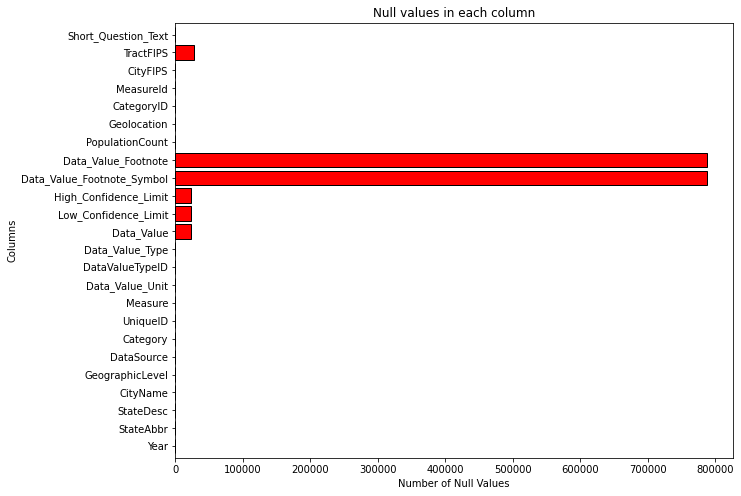

In [10]:
all_nulls.plot.barh(figsize=(10,8), width = 0.8, color = 'red', edgecolor='black')
plt.title('Null values in each column')
plt.xlabel("Number of Null Values")
plt.ylabel("Columns")
plt.show()

In [11]:
df1.isnull().sum().sum()            # count of total null values in the dataframe

1671218

##### There are **1671218** null values in total.

#### Counting the number of Null values in specific column.

In [12]:
df1["CityFIPS"].isnull().sum()         # count of null values in "CityFIPS" column (particular column)

56

#### Removing the unrequired columns from the raw dataframe.

In [13]:
# Deleting the Datasource column as it is known that the source file is same for all the data and it has nothing to do majorly

df1.drop(columns = ["DataSource", "Data_Value_Unit", "DataValueTypeID", "Data_Value_Type", "Data_Value_Footnote_Symbol", "Data_Value_Footnote", "Geolocation"],
         inplace = True)

df1.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'Category', 'UniqueID', 'Measure', 'Data_Value', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'PopulationCount', 'CategoryID', 'MeasureId',
       'CityFIPS', 'TractFIPS', 'Short_Question_Text'],
      dtype='object')

#### Then checking for Null values in the required columns.

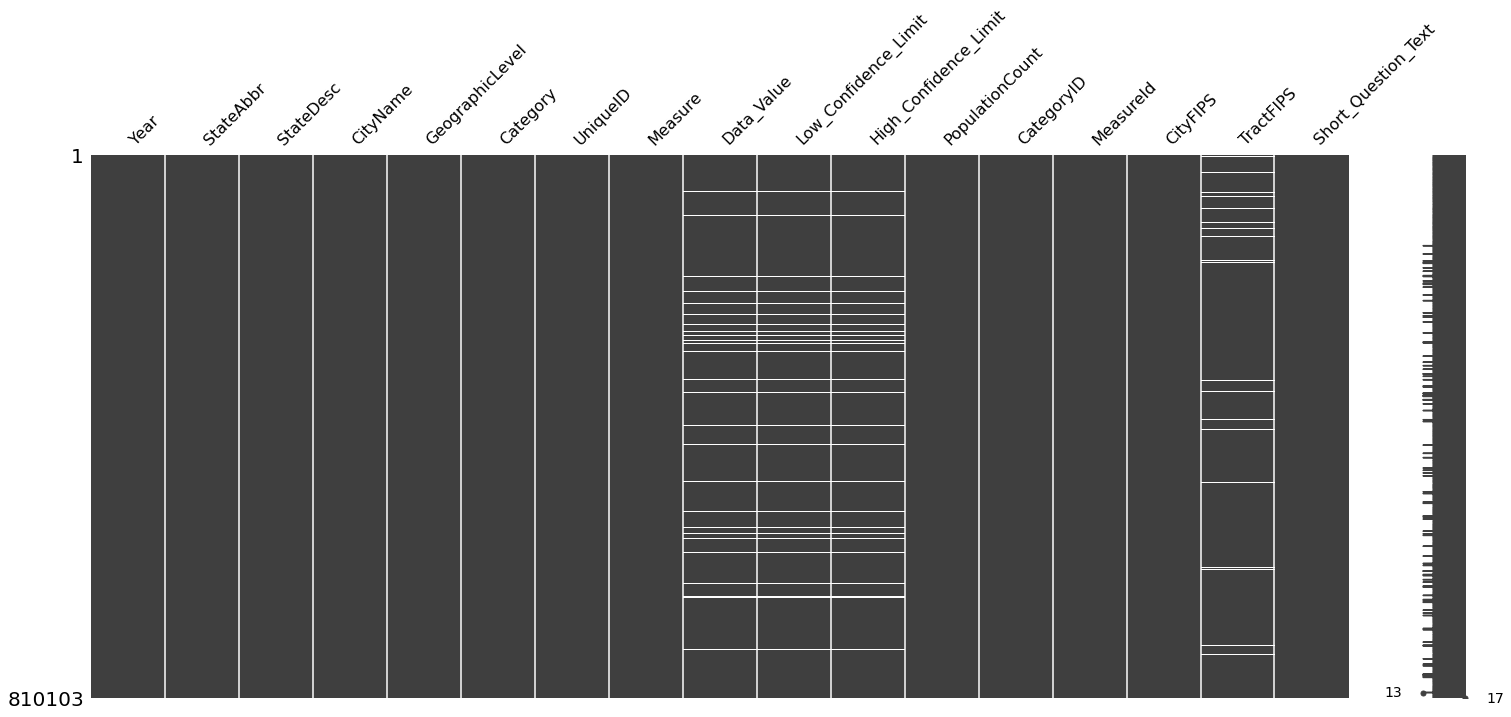

In [14]:
# Visualizing the dataframe to identify the missing values in our dataframe. 

msno.matrix(df1)

#### We can see that there are missing values in Data_Value, Low-Confidence_Limit, High_Confidence_Limit.

#### Verifying the data types.

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   810103 non-null  int64  
 1   StateAbbr              810103 non-null  object 
 2   StateDesc              810103 non-null  object 
 3   CityName               810047 non-null  object 
 4   GeographicLevel        810103 non-null  object 
 5   Category               810103 non-null  object 
 6   UniqueID               810103 non-null  object 
 7   Measure                810103 non-null  object 
 8   Data_Value             787311 non-null  float64
 9   Low_Confidence_Limit   787311 non-null  float64
 10  High_Confidence_Limit  787311 non-null  float64
 11  PopulationCount        810103 non-null  int64  
 12  CategoryID             810103 non-null  object 
 13  MeasureId              810103 non-null  object 
 14  CityFIPS               810047 non-nu

#### Finding Unique states.

In [16]:
unique_states = df1.StateDesc.unique()
unique_states  

array(['Indiana', 'California', 'Connecticut', 'Florida', 'Texas',
       'Illinois', 'Alabama', 'Washington', 'Arizona', 'Maine',
       'Colorado', 'Ohio', 'Oklahoma', 'Montana', 'Virginia',
       'New Hampshire', 'Minnesota', 'Hawaii', 'New York',
       'Massachusetts', 'Wisconsin', 'Tennessee', 'Iowa', 'Utah',
       'Nebraska', 'Kentucky', 'Alaska', 'Louisiana', 'Michigan',
       'Nevada', 'Kansas', 'Oregon', 'Maryland', 'New Jersey', 'Missouri',
       'North Carolin', 'Georgia', 'Pennsylvania', 'Arkansas',
       'Rhode Island', 'Idaho', 'Wyoming', 'United States',
       'South Carolin', 'West Virginia', 'Delaware', 'New Mexico',
       'Vermont', 'North Dakota', 'South Dakota', 'Mississippi',
       'District of C'], dtype=object)

In [17]:
len(unique_states)

52

#### So, 52 unique states are there for our analysis.

In [18]:
df1["StateDesc"].value_counts()

California       156778
Texas             89422
New York          70133
Florida           39025
Illinois          37458
Arizona           29678
Ohio              24111
North Carolin     23305
Michigan          21672
Colorado          20549
Pennsylvania      18392
Washington        15448
Tennessee         15299
Indiana           15281
Virginia          14630
Massachusetts     14346
Oklahoma          13532
Georgia           13251
Missouri          13028
Wisconsin         11849
Louisiana         10875
Nevada            10639
Alabama           10593
Oregon            10402
Minnesota          9123
New Jersey         9013
Kansas             8913
Kentucky           7527
Utah               7431
Hawaii             6721
Connecticut        6603
New Mexico         6273
Nebraska           6216
Iowa               5889
Maryland           5655
South Carolin      5131
District of C      5065
Arkansas           3679
Rhode Island       2993
Mississippi        2229
Idaho              2070
South Dakota    

In [19]:
top10_states = df1["StateDesc"].value_counts().head(10)
top10_states

California       156778
Texas             89422
New York          70133
Florida           39025
Illinois          37458
Arizona           29678
Ohio              24111
North Carolin     23305
Michigan          21672
Colorado          20549
Name: StateDesc, dtype: int64

### **Plotting top 10 states from the records.**

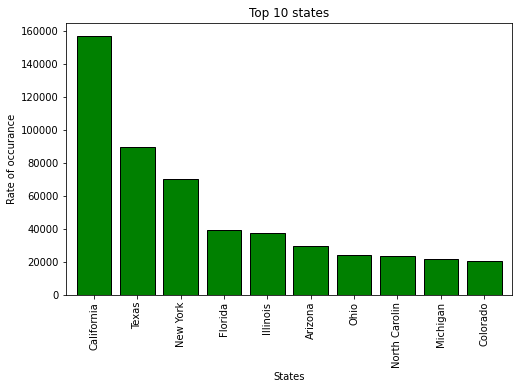

In [20]:
top10_states.plot(kind='bar',figsize=(8,5), width = 0.8, color = 'green', edgecolor='black')
plt.title('Top 10 states')
plt.xlabel("States")
plt.ylabel("Rate of occurance")
plt.show()

#### Each state is repeated above shown number of times in the overall dataset.

In [21]:
unique_cities = df1.CityName.unique()
unique_cities

array(['Fishers', 'Milpitas', 'Stamford', 'Elk Grove', 'Palm Bay',
       'Houston', 'Chicago', 'Pasadena', 'Birmingham', 'Tampa',
       'Evansville', 'Fontana', 'Fort Worth', 'Seattle', 'Bridgeport',
       'Mesa', 'Portland', 'League City', 'Tucson', 'Colorado Springs',
       'Cleveland', 'Pleasanton', 'Los Angeles', 'Parma', 'Tulsa',
       'Missoula', 'Lynchburg', 'Nashua', 'Brooklyn Park', 'Santa Rosa',
       'Alhambra', 'Honolulu', 'New York', 'Quincy', 'Norwalk', 'Irving',
       'Waukesha', 'Nashville', 'Mesquite', 'Davenport', 'Richmond',
       'San Antonio', 'Lancaster', 'Berkeley', 'Fresno', 'Upland',
       'Elgin', 'Tacoma', 'Orem', 'Toledo', 'Citrus Heights', 'Akron',
       'Waterloo', 'Cicero', 'Pearland', 'Minneapolis', 'Omaha', 'Tyler',
       'Lexington', 'Dallas', 'Compton', 'Lubbock', 'Bakersfield',
       'San Bernardino', 'Anchorage', 'Corpus Christi', 'New Orleans',
       'Livonia', 'Santa Ana', 'Suffolk', 'Las Vegas', 'Edmond',
       'Wichita', 'Eugene', 

In [22]:
len(unique_cities)

475

#### In 52 unique states, there are 475 unique cities in our collection.

In [23]:
df1["CityName"].value_counts()

New York        59911
Los Angeles     28119
Chicago         22369
Houston         16787
Philadelphia    10707
                ...  
Allen             364
Perris            363
Pharr             308
Fishers           308
Meridian          280
Name: CityName, Length: 474, dtype: int64

In [24]:
top10_cities = df1["CityName"].value_counts().head(10)
top10_cities

New York        59911
Los Angeles     28119
Chicago         22369
Houston         16787
Philadelphia    10707
Phoenix         10097
San Antonio      9145
Dallas           8959
Detroit          8335
San Diego        8315
Name: CityName, dtype: int64

### **Plotting top 10 cities.**

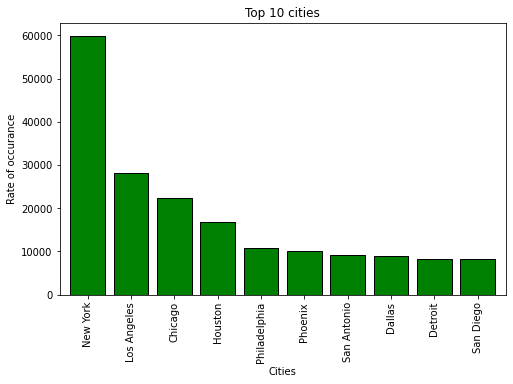

In [25]:
top10_cities.plot(kind='bar',figsize=(8,5), width = 0.8, color = 'green', edgecolor='black')
plt.title('Top 10 cities')
plt.xlabel("Cities")
plt.ylabel("Rate of occurance")
plt.show()

#### Considering New York state and the corresponding Categories with City details.

In [26]:
sta_cat = df1[["StateDesc", "Category", "CityFIPS", "CityName"]]

sta_cat.sample(5)

,StateDesc,Category,CityFIPS,CityName
265998,Texas,Health Outcomes,4847892.0,Mesquite
172404,Alabama,Prevention,177256.0,Tuscaloosa
581620,Minnesota,Health Outcomes,2706616.0,Bloomington
184563,Georgia,Prevention,1319000.0,Columbus
49294,Florida,Health Outcomes,1225175.0,Gainesville


In [27]:
NY_data = df1[df1["StateDesc"] == "New York"]
NY_data.sample(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,Category,UniqueID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
619495,2016,NY,New York,New York,Census Tract,Prevention,3651000-36081035200,Current lack of health insurance among adults ...,11.8,10.3,13.6,2414,PREVENT,ACCESS2,3651000.0,3.608104e+10,Health Insurance
291188,2016,NY,New York,New York,Census Tract,Health Outcomes,3651000-36081024500,Mental health not good for >=14 days among adu...,10.0,9.2,10.9,4942,HLTHOUT,MHLTH,3651000.0,3.608102e+10,Mental Health
493050,2016,NY,New York,New York,Census Tract,Prevention,3651000-36061006900,"Fecal occult blood test, sigmoidoscopy, or col...",73.8,71.0,75.7,2759,PREVENT,COLON_SCREEN,3651000.0,3.606101e+10,Colorectal Cancer Screening


In [28]:
NY_data.shape

(70133, 17)

### Vizualization using SweetViz.

In [29]:
pip install sweetviz   # Installing SweetViz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 21.3 MB/s 


In [30]:
import sweetviz as sv 

#analyzing the dataset
NY_report = sv.analyze(NY_data)

#display the report
NY_report.show_html(filepath = 'NY_info.html', open_browser = True, layout = 'widescreen', scale = None) 

                                             |          | [  0%]   00:00 -> (? left)

Report NY_info.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
# Dividing the dataset into test and train datasets and Comparing them

NY_compare = sv.compare(NY_data[100:], NY_data[:100])
NY_compare.show_html(filepath = 'Compare.html', open_browser = True, layout = 'widescreen', scale = None) 

                                             |          | [  0%]   00:00 -> (? left)

Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### **Extracting the data for Unhealthy Behaviours from New York state**

In [32]:
NY_data_unhealth = NY_data[NY_data["Category"] == "Unhealthy Behaviors"]
NY_data_unhealth.sample(3) 

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,Category,UniqueID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
502097,2016,NY,New York,New York,Census Tract,Unhealthy Behaviors,3651000-36047058200,Sleeping less than 7 hours among adults aged >...,41.4,40.3,42.4,2967,UNHBEH,SLEEP,3651000.0,3.604706e+10,Sleep <7 hours
427555,2016,NY,New York,New York,Census Tract,Unhealthy Behaviors,3651000-36081124700,Binge drinking among adults aged >=18 Years,15.9,15.6,16.3,3550,UNHBEH,BINGE,3651000.0,3.608112e+10,Binge Drinking
681311,2016,NY,New York,New York,Census Tract,Unhealthy Behaviors,3651000-36005019400,Binge drinking among adults aged >=18 Years,18.9,18.4,19.4,1903,UNHBEH,BINGE,3651000.0,3.600502e+10,Binge Drinking


In [33]:
NY_data_unhealth.shape

(12540, 17)

In [34]:
NY1 = NY_data_unhealth[["StateDesc", "Category", "CityFIPS", "CityName"]]
NY1.sample(5)

,StateDesc,Category,CityFIPS,CityName
620434,New York,Unhealthy Behaviors,3651000.0,New York
301637,New York,Unhealthy Behaviors,3651000.0,New York
757113,New York,Unhealthy Behaviors,3651000.0,New York
776062,New York,Unhealthy Behaviors,3673000.0,Syracuse
542292,New York,Unhealthy Behaviors,3651000.0,New York


#### **Extracting the data for Prevention from New York state**

In [35]:
NY_data_prev = NY_data[NY_data["Category"] == "Prevention"]
NY_data_prev.sample(3) 

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,Category,UniqueID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
45825,2015,NY,New York,New York,Census Tract,Prevention,3651000-36047024900,Taking medicine for high blood pressure contro...,74.1,73.0,75.3,3823,PREVENT,BPMED,3651000.0,3.604702e+10,Taking BP Medication
660286,2016,NY,New York,New York,Census Tract,Prevention,3651000-36005031400,Older adult women aged >=65 Years who are up t...,35.9,31.4,40.3,1966,PREVENT,COREW,3651000.0,3.600503e+10,Core preventive services for older women
762664,2016,NY,New York,New York,Census Tract,Prevention,3651000-36081122702,Mammography use among women aged 50–74 Years,79.5,78.1,80.9,6427,PREVENT,MAMMOUSE,3651000.0,3.608112e+10,Mammography


In [36]:
NY_data_prev.shape 

(25007, 17)

In [37]:
NY2 = NY_data_prev[["StateDesc", "Category", "CityFIPS", "CityName"]]
NY2.sample(5)

,StateDesc,Category,CityFIPS,CityName
40971,New York,Prevention,3651000.0,New York
343070,New York,Prevention,3651000.0,New York
703524,New York,Prevention,3651000.0,New York
438786,New York,Prevention,3651000.0,New York
809663,New York,Prevention,3673000.0,Syracuse


#### **Extracting the data for Health Outcomes from New York state**

In [38]:
NY_data_HO = NY_data[NY_data["Category"] == "Health Outcomes"]
NY_data_HO.sample(3) 

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,Category,UniqueID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
158327,2016,NY,New York,New York,Census Tract,Health Outcomes,3651000-36005006500,Coronary heart disease among adults aged >=18 ...,6.4,6.0,6.9,5337,HLTHOUT,CHD,3651000.0,3.600501e+10,Coronary Heart Disease
448165,2016,NY,New York,Buffalo,Census Tract,Health Outcomes,3611000-36029006800,Cancer (excluding skin cancer) among adults ag...,4.8,4.6,4.9,3380,HLTHOUT,CANCER,3611000.0,3.602901e+10,Cancer (except skin)
387354,2016,NY,New York,New York,Census Tract,Health Outcomes,3651000-36047102600,Physical health not good for >=14 days among a...,10.1,8.8,11.5,2771,HLTHOUT,PHLTH,3651000.0,3.604710e+10,Physical Health


In [39]:
NY_data_HO.shape 

(32586, 17)

In [40]:
NY3 = NY_data_HO[["StateDesc", "Category", "CityFIPS", "CityName"]]
NY3.sample(5) 

,StateDesc,Category,CityFIPS,CityName
768658,New York,Health Outcomes,3651000.0,New York
44167,New York,Health Outcomes,3651000.0,New York
587675,New York,Health Outcomes,3673000.0,Syracuse
106389,New York,Health Outcomes,3651000.0,New York
722454,New York,Health Outcomes,3611000.0,Buffalo


In [41]:
NY_cat = NY_data[["StateDesc", "Category", "CityFIPS", "CityName"]]
NY_cat.sample(5)

,StateDesc,Category,CityFIPS,CityName
768569,New York,Health Outcomes,3651000.0,New York
427762,New York,Health Outcomes,3684000.0,Yonkers
405652,New York,Unhealthy Behaviors,3665508.0,Schenectady
434258,New York,Unhealthy Behaviors,3651000.0,New York
697814,New York,Prevention,3651000.0,New York


In [42]:
NY_cat.shape

(70133, 4)

#### **Digging more deeper, extracting the "Health Outcomes" category from the dataframe of some important features**

In [43]:
NY_cat_HO = NY_cat[NY_cat["Category"] == "Health Outcomes"]
NY_cat_HO.sample(5)

,StateDesc,Category,CityFIPS,CityName
85500,New York,Health Outcomes,3651000.0,New York
637008,New York,Health Outcomes,3651000.0,New York
404707,New York,Health Outcomes,3651000.0,New York
769091,New York,Health Outcomes,3651000.0,New York
370456,New York,Health Outcomes,3651000.0,New York


In [44]:
NY_cat_HO.shape

(32586, 4)

#### **Extracting the "Prevention" category from the dataframe of some important features**

In [45]:
NY_cat_prev = NY_cat[NY_cat["Category"] == "Prevention"]
NY_cat_prev.sample(5)

,StateDesc,Category,CityFIPS,CityName
390156,New York,Prevention,3651000.0,New York
125380,New York,Prevention,3651000.0,New York
318039,New York,Prevention,3649121.0,Mount Vernon
444500,New York,Prevention,3651000.0,New York
411525,New York,Prevention,3651000.0,New York


In [46]:
NY_cat_prev.shape

(25007, 4)

#### **Extracting the "Health Outcomes" category from the dataframe of some important features**

In [47]:
NY_cat_unheal = NY_cat[NY_cat["Category"] == "Unhealthy Behaviors"]
NY_cat_unheal.sample(5)

,StateDesc,Category,CityFIPS,CityName
725622,New York,Unhealthy Behaviors,3651000.0,New York
628342,New York,Unhealthy Behaviors,3651000.0,New York
537629,New York,Unhealthy Behaviors,3651000.0,New York
187850,New York,Unhealthy Behaviors,3651000.0,New York
703246,New York,Unhealthy Behaviors,3663000.0,Rochester


In [48]:
NY_cat_unheal.shape

(12540, 4)

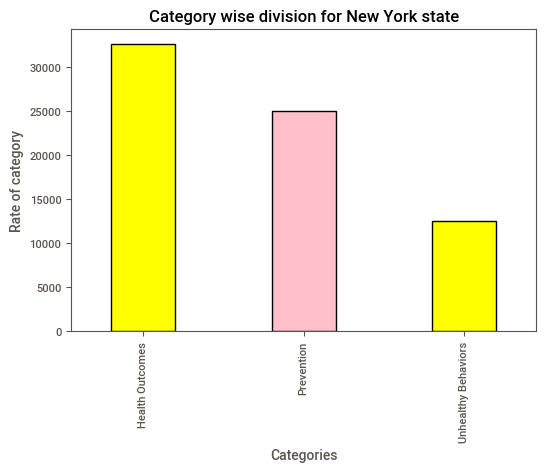

In [49]:
NY_cat_count = NY_cat['Category'].value_counts()
NY_cat_count.plot(kind='bar',figsize=(6,4), width = 0.4, color = ['yellow', 'pink', 'yellow'], edgecolor='black')
plt.title('Category wise division for New York state')
plt.xlabel("Categories")
plt.ylabel("Rate of category")
plt.show()

### **Working on "Oklahoma" state records.**

In [50]:
okl_cat = sta_cat[sta_cat["StateDesc"] == "Oklahoma"]
okl_cat.sample(5)

,StateDesc,Category,CityFIPS,CityName
241030,Oklahoma,Unhealthy Behaviors,4055000.0,Oklahoma City
572511,Oklahoma,Prevention,4041850.0,Lawton
328550,Oklahoma,Unhealthy Behaviors,4055000.0,Oklahoma City
724871,Oklahoma,Health Outcomes,4055000.0,Oklahoma City
365745,Oklahoma,Health Outcomes,4055000.0,Oklahoma City


#### **Extracting the "Health Outcomes" category for Oklahoma state**

In [51]:
okl_cat_HO = okl_cat[okl_cat["Category"] == "Health Outcomes"]
okl_cat_HO.sample(5)

,StateDesc,Category,CityFIPS,CityName
249119,Oklahoma,Health Outcomes,4055000.0,Oklahoma City
467640,Oklahoma,Health Outcomes,4055000.0,Oklahoma City
229439,Oklahoma,Health Outcomes,4055000.0,Oklahoma City
374505,Oklahoma,Health Outcomes,4055000.0,Oklahoma City
721675,Oklahoma,Health Outcomes,4075000.0,Tulsa


#### **Extracting the "Unhealthy Behaviors" category for Oklahoma state**

In [52]:
okl_cat_unheal = okl_cat[okl_cat["Category"] == "Unhealthy Behaviors"]
okl_cat_unheal.sample(5)

,StateDesc,Category,CityFIPS,CityName
594532,Oklahoma,Unhealthy Behaviors,4055000.0,Oklahoma City
326551,Oklahoma,Unhealthy Behaviors,4075000.0,Tulsa
547154,Oklahoma,Unhealthy Behaviors,4075000.0,Tulsa
623225,Oklahoma,Unhealthy Behaviors,4023200.0,Edmond
425690,Oklahoma,Unhealthy Behaviors,4075000.0,Tulsa


#### **Extracting the "Prevention" category for Oklahoma state**

In [53]:
okl_cat_prev = okl_cat[okl_cat["Category"] == "Prevention"]
okl_cat_prev.sample(5)

,StateDesc,Category,CityFIPS,CityName
457082,Oklahoma,Prevention,4075000.0,Tulsa
57687,Oklahoma,Prevention,4055000.0,Oklahoma City
108914,Oklahoma,Prevention,4023200.0,Edmond
256230,Oklahoma,Prevention,4075000.0,Tulsa
764385,Oklahoma,Prevention,4055000.0,Oklahoma City


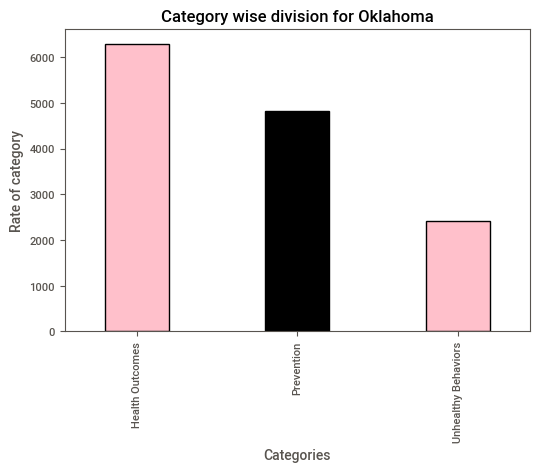

In [54]:
okl_cat_count = okl_cat['Category'].value_counts()
okl_cat_count.plot(kind='bar',figsize=(6,4), width = 0.4, color = ['pink', 'black', 'pink'], edgecolor='black')
plt.title('Category wise division for Oklahoma')
plt.xlabel("Categories")
plt.ylabel("Rate of category")
plt.show()

## **Processing the data for further use**

In [55]:
cols_of_int = df1[["Year", "StateDesc", "CityName", "CityFIPS", "GeographicLevel", "CategoryID", "MeasureId",  "Data_Value", "PopulationCount"]]

cols_of_int.tail() 

,Year,StateDesc,CityName,CityFIPS,GeographicLevel,CategoryID,MeasureId,Data_Value,PopulationCount
810098,2016,California,Clovis,614218.0,Census Tract,UNHBEH,BINGE,18.5,3346
810099,2016,California,Fremont,626000.0,Census Tract,UNHBEH,CSMOKING,12.6,6253
810100,2016,Hawaii,Honolulu,15003.0,Census Tract,HLTHOUT,CHD,6.6,5155
810101,2016,California,Los Angeles,644000.0,Census Tract,HLTHOUT,MHLTH,10.8,3095
810102,2016,Texas,Dallas,4819000.0,Census Tract,HLTHOUT,TEETHLOST,7.0,1733


In [56]:
# Tried to use Pivot table to seggregate records but it has not done greater help for our further analysis.

fips_piv = cols_of_int.pivot_table("CityFIPS", index = "CityName", columns = "CategoryID")
fips_piv

CategoryID,HLTHOUT,PREVENT,UNHBEH
CityName,,,
Abilene,4.801000e+06,4.801000e+06,4.801000e+06
Akron,3.901000e+06,3.901000e+06,3.901000e+06
Alameda,6.005620e+05,6.005620e+05,6.005620e+05
Albany,2.471935e+06,2.471935e+06,2.471935e+06
Albuquerque,3.502000e+06,3.502000e+06,3.502000e+06
...,...,...,...
Wyoming,2.688940e+06,2.688940e+06,2.688940e+06
Yakima,5.380010e+06,5.380010e+06,5.380010e+06
Yonkers,3.684000e+06,3.684000e+06,3.684000e+06


### Consider **cols_of_int** dataframe as the main dataframe from now on.

In [57]:
cols_of_int.head()

,Year,StateDesc,CityName,CityFIPS,GeographicLevel,CategoryID,MeasureId,Data_Value,PopulationCount
0,2015,Indiana,Fishers,1823278.0,City,HLTHOUT,BPHIGH,24.2,76794
1,2015,California,Milpitas,647766.0,City,HLTHOUT,BPHIGH,22.2,66790
2,2015,Connecticut,Stamford,973000.0,City,HLTHOUT,BPHIGH,26.0,122643
3,2015,California,Elk Grove,622020.0,City,HLTHOUT,BPHIGH,27.7,153015
4,2015,Florida,Palm Bay,1254000.0,City,PREVENT,CHOLSCREEN,78.0,103190


In [58]:
cols_of_int.shape

(810103, 9)

### **Balncing the imbalanced dataset**

In [59]:
cols_of_int['CategoryID'].value_counts()   # checking the count of each class/category

HLTHOUT    376673
PREVENT    288400
UNHBEH     145030
Name: CategoryID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


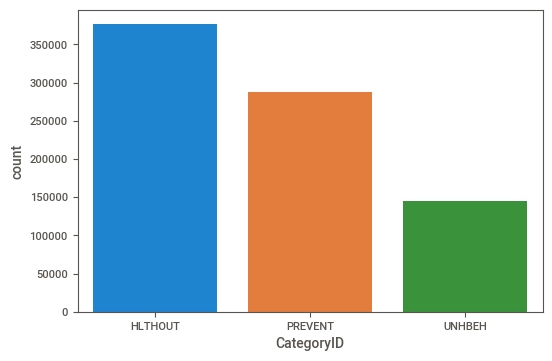

In [60]:
# Visualizing the difference in each class using seaborn

sns.countplot(cols_of_int['CategoryID'])

### From the above visualization, it is observed that the target class has an imbalance. Therefore, we need to match the majority class with the minority class.

In [61]:
# Creating different dataframes of seperate classes
df_class1 = cols_of_int[(cols_of_int['CategoryID'] == 'HLTHOUT')] 
df_class2 = cols_of_int[(cols_of_int['CategoryID'] == 'PREVENT')]
df_class3 = cols_of_int[(cols_of_int['CategoryID'] == 'UNHBEH')]

In [62]:
# Upsampling the least class
df_class3_upsampled = resample(df_class3, 
                                 replace = True,    # sample with replacement
                                 n_samples = 288400, # to match moderate class
                                 random_state = 42)  # reproducible results

In [63]:
# Downsampling the higher class
df_class1_downsampled = resample(df_class1,
                                 replace = True,    # sample with replacement
                                 n_samples = 288400,   # to match moderate class
                                 random_state = 42)    # reproducible results

In [64]:
# Combine majority class with upsampled minority class

df_upsampled = pd.concat([df_class3_upsampled, df_class2])

In [65]:
# Combining the downsampled and concatination of upsampled and moderate class
df_resampled = pd.concat([df_class1_downsampled, df_upsampled])

### Checking the distribution of classes.

In [66]:
df_resampled['CategoryID'].value_counts()

HLTHOUT    288400
UNHBEH     288400
PREVENT    288400
Name: CategoryID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


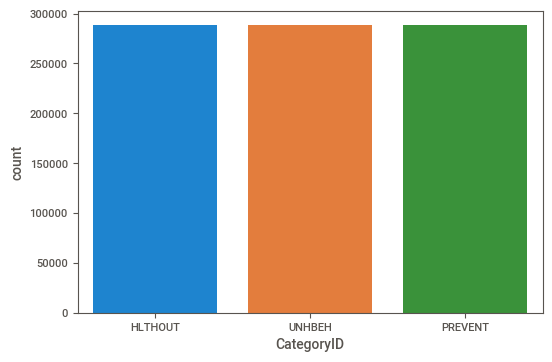

In [67]:
# Visualizing the records with resampled data

sns.countplot(df_resampled['CategoryID'])

#### Therefore, the data is balanced now.

In [68]:
df_resampled.head()

,Year,StateDesc,CityName,CityFIPS,GeographicLevel,CategoryID,MeasureId,Data_Value,PopulationCount
254923,2016,Oklahoma,Tulsa,4075000.0,Census Tract,HLTHOUT,PHLTH,10.0,2710
309287,2016,Colorado,Colorado Springs,816000.0,Census Tract,HLTHOUT,TEETHLOST,17.4,1961
276763,2016,Texas,Dallas,4819000.0,Census Tract,HLTHOUT,CANCER,10.1,1839
786640,2016,Indiana,Evansville,1822000.0,Census Tract,HLTHOUT,CASTHMA,12.1,1894
554204,2016,New York,New York,3651000.0,Census Tract,HLTHOUT,ARTHRITIS,29.8,26588


## **Trying to encode the Categorical values**

### Let us consider only the required columns for the future usage

In [69]:
cols_of_int = cols_of_int[["Year", "StateDesc", "CityName", "CityFIPS", "GeographicLevel", "CategoryID", "MeasureId"]]

In [70]:
cols_of_int.dtypes

Year                 int64
StateDesc           object
CityName            object
CityFIPS           float64
GeographicLevel     object
CategoryID          object
MeasureId           object
dtype: object

In [71]:
cols_of_int.shape

(810103, 7)

#### Pulling out only the columns with data type **Object** for encoding

In [72]:
obj_df = cols_of_int.select_dtypes(include=['object']).copy()
obj_df.sample(5)

,StateDesc,CityName,GeographicLevel,CategoryID,MeasureId
803566,New York,New York,Census Tract,UNHBEH,SLEEP
534654,New York,New York,Census Tract,HLTHOUT,TEETHLOST
139616,California,San Francisco,Census Tract,HLTHOUT,TEETHLOST
198241,Texas,Pasadena,Census Tract,HLTHOUT,TEETHLOST
551677,Colorado,Thornton,Census Tract,PREVENT,CHECKUP


In [73]:
obj_df["CategoryID"].value_counts()

HLTHOUT    376673
PREVENT    288400
UNHBEH     145030
Name: CategoryID, dtype: int64

In [74]:
obj_df["GeographicLevel"].value_counts()

Census Tract    782047
City             28000
US                  56
Name: GeographicLevel, dtype: int64

In [75]:
cleanup_1 = {"CategoryID":     {"HLTHOUT": 1, "UNHBEH": 2, "PREVENT": 3},
                "GeographicLevel": {"Census Tract": 11, "City": 22, "US": 33}}

### Converting the values in the columns to numeric

In [76]:
obj_df = obj_df.replace(cleanup_1)
obj_df.head()

,StateDesc,CityName,GeographicLevel,CategoryID,MeasureId
0,Indiana,Fishers,22,1,BPHIGH
1,California,Milpitas,22,1,BPHIGH
2,Connecticut,Stamford,22,1,BPHIGH
3,California,Elk Grove,22,1,BPHIGH
4,Florida,Palm Bay,22,3,CHOLSCREEN


In [77]:
obj_df.shape

(810103, 5)

### Encoding of the columns **GeographicLevel**, **CategoryID** is done.

In [78]:
obj_df.dtypes

StateDesc          object
CityName           object
GeographicLevel     int64
CategoryID          int64
MeasureId          object
dtype: object

In [79]:
obj_df["MeasureId"].value_counts()

BPHIGH          29006
CSMOKING        29006
PHLTH           29006
CHECKUP         29006
HIGHCHOL        29006
BPMED           29006
KIDNEY          29006
DENTAL          29006
SLEEP           29006
CASTHMA         29006
CHOLSCREEN      29006
CHD             29006
LPA             29006
COPD            29006
MHLTH           29006
CANCER          29006
BINGE           29006
DIABETES        29006
OBESITY         29006
STROKE          29006
ARTHRITIS       29006
ACCESS2         28973
PAPTEST         28912
COLON_SCREEN    28847
MAMMOUSE        28727
TEETHLOST       28601
COREM           28464
COREW           28453
Name: MeasureId, dtype: int64

### Using **One Hot Encoding** to encode **MeaureID** column

In [80]:
obj_df = pd.get_dummies(obj_df, columns=["MeasureId"])
obj_df.head(8)

,StateDesc,CityName,GeographicLevel,CategoryID,MeasureId_ACCESS2,MeasureId_ARTHRITIS,MeasureId_BINGE,MeasureId_BPHIGH,MeasureId_BPMED,MeasureId_CANCER,...,MeasureId_KIDNEY,MeasureId_LPA,MeasureId_MAMMOUSE,MeasureId_MHLTH,MeasureId_OBESITY,MeasureId_PAPTEST,MeasureId_PHLTH,MeasureId_SLEEP,MeasureId_STROKE,MeasureId_TEETHLOST
0,Indiana,Fishers,22,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,California,Milpitas,22,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Connecticut,Stamford,22,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,California,Elk Grove,22,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Florida,Palm Bay,22,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Texas,Houston,22,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Illinois,Chicago,11,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Texas,Pasadena,11,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
obj_df.dtypes

StateDesc                 object
CityName                  object
GeographicLevel            int64
CategoryID                 int64
MeasureId_ACCESS2          uint8
MeasureId_ARTHRITIS        uint8
MeasureId_BINGE            uint8
MeasureId_BPHIGH           uint8
MeasureId_BPMED            uint8
MeasureId_CANCER           uint8
MeasureId_CASTHMA          uint8
MeasureId_CHD              uint8
MeasureId_CHECKUP          uint8
MeasureId_CHOLSCREEN       uint8
MeasureId_COLON_SCREEN     uint8
MeasureId_COPD             uint8
MeasureId_COREM            uint8
MeasureId_COREW            uint8
MeasureId_CSMOKING         uint8
MeasureId_DENTAL           uint8
MeasureId_DIABETES         uint8
MeasureId_HIGHCHOL         uint8
MeasureId_KIDNEY           uint8
MeasureId_LPA              uint8
MeasureId_MAMMOUSE         uint8
MeasureId_MHLTH            uint8
MeasureId_OBESITY          uint8
MeasureId_PAPTEST          uint8
MeasureId_PHLTH            uint8
MeasureId_SLEEP            uint8
MeasureId_

In [82]:
obj_df.shape

(810103, 32)

#### This is correct shape of the dataset as they are encoded.

### There are 2 more Categorical columns left in the dataframe for encoding. Using the same **OneHot Encoding** for them as well.

In [83]:
obj_df = pd.get_dummies(obj_df, columns=["StateDesc"])
obj_df.head(4)

,CityName,GeographicLevel,CategoryID,MeasureId_ACCESS2,MeasureId_ARTHRITIS,MeasureId_BINGE,MeasureId_BPHIGH,MeasureId_BPMED,MeasureId_CANCER,MeasureId_CASTHMA,...,StateDesc_Tennessee,StateDesc_Texas,StateDesc_United States,StateDesc_Utah,StateDesc_Vermont,StateDesc_Virginia,StateDesc_Washington,StateDesc_West Virginia,StateDesc_Wisconsin,StateDesc_Wyoming
0,Fishers,22,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Milpitas,22,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Stamford,22,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Elk Grove,22,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
obj_df.shape

(810103, 83)

In [85]:
FINAL_df = pd.get_dummies(obj_df, columns=["CityName"])
FINAL_df.head(6)

,GeographicLevel,CategoryID,MeasureId_ACCESS2,MeasureId_ARTHRITIS,MeasureId_BINGE,MeasureId_BPHIGH,MeasureId_BPMED,MeasureId_CANCER,MeasureId_CASTHMA,MeasureId_CHD,...,CityName_Wichita,CityName_Wichita Falls,CityName_Wilmington,CityName_Winston-Salem,CityName_Worcester,CityName_Wyoming,CityName_Yakima,CityName_Yonkers,CityName_Youngstown,CityName_Yuma
0,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
FINAL_df.dtypes

GeographicLevel        int64
CategoryID             int64
MeasureId_ACCESS2      uint8
MeasureId_ARTHRITIS    uint8
MeasureId_BINGE        uint8
                       ...  
CityName_Wyoming       uint8
CityName_Yakima        uint8
CityName_Yonkers       uint8
CityName_Youngstown    uint8
CityName_Yuma          uint8
Length: 556, dtype: object

In [87]:
FINAL_df.shape

(810103, 556)

#### By checking the data types of all the columns as above, all the categorical values are encoded into numeric values which is ready to implement in the machine learning models and the shape of the dataset is also correct.

### Let us start machine learning models with the dataframe **FINAL_df**.

In [88]:
FINAL_df.head()

,GeographicLevel,CategoryID,MeasureId_ACCESS2,MeasureId_ARTHRITIS,MeasureId_BINGE,MeasureId_BPHIGH,MeasureId_BPMED,MeasureId_CANCER,MeasureId_CASTHMA,MeasureId_CHD,...,CityName_Wichita,CityName_Wichita Falls,CityName_Wilmington,CityName_Winston-Salem,CityName_Worcester,CityName_Wyoming,CityName_Yakima,CityName_Yonkers,CityName_Youngstown,CityName_Yuma
0,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
FINAL_df.columns

Index(['GeographicLevel', 'CategoryID', 'MeasureId_ACCESS2',
       'MeasureId_ARTHRITIS', 'MeasureId_BINGE', 'MeasureId_BPHIGH',
       'MeasureId_BPMED', 'MeasureId_CANCER', 'MeasureId_CASTHMA',
       'MeasureId_CHD',
       ...
       'CityName_Wichita', 'CityName_Wichita Falls', 'CityName_Wilmington',
       'CityName_Winston-Salem', 'CityName_Worcester', 'CityName_Wyoming',
       'CityName_Yakima', 'CityName_Yonkers', 'CityName_Youngstown',
       'CityName_Yuma'],
      dtype='object', length=556)

# **Machine Learning**

In [90]:
X = FINAL_df[FINAL_df.columns]

y = FINAL_df["CategoryID"]

In [91]:
print(X.shape, y.shape)

(810103, 556) (810103,)


In [92]:
X_train, y_train, X_test, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, 
                                                    random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(567072, 556) (567072,) (243031, 556) (243031,)


### Converting X_train & y_train to be with same number of entries.

In [93]:
X_train = X_train.transpose()
y_train = y_train.transpose()

In [94]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(556, 567072) (567072,) (556, 243031) (243031,)


### **Cross validation for Decision Tree Classifier**

In [95]:
X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)

dec_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0) 
dec_scores = cross_val_score(dec_clf, X, y, cv=5)
print("Cross validated scores for DecisionTree classifier:", dec_scores)
print("Accuracy is:", dec_scores.mean())
print("Standard Deviation is:", dec_scores.std())

Cross validated scores for DecisionTree classifier: [0.982  0.982  0.9855 0.982  0.98  ]


0.9823000000000001

## Accuracy of Cross Validation for decisiontree is 0.98 and Standard Deviation is 0.0017

In [96]:
X.shape, y.shape

((10000, 10), (10000,))

### **Cross validation for Random Forest classifier**

In [97]:
ran_clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
ran_scores = cross_val_score(ran_clf, X, y, cv=5)
print("Cross validated scores for RandomForest classifier:", ran_scores)
print("Accuracy is:", ran_scores.mean())
print("Standard Deviation is:", ran_scores.std())

Cross validated scores for RandomForest classifier: [1.     1.     0.9995 1.     0.999 ]


0.9997

## Accuracy of Cross Validation for Randomforest is 0.99 and Standard Deviation is 0.0003